Project guide: https://www.dataquest.io/m/288/guided-project%3A-investigating-fandango-movie-ratings

Solution by DataQuest: https://github.com/dataquestio/solutions/blob/master/Mission288Solutions.ipynb

In 2015, Walt Hickey revealed that [Fandango](https://www.fandango.com/), a movie ratings website, [exaggerated their ratings](https://fivethirtyeight.com/features/fandango-movies-ratings/). By looking into the HTML of each movie's page, he collected two versions of ratings: true rating and the rating displayed on the web page. It turned out that true ratings were rounded up in a way that the ratings displayed on the pages were exaggerated. Fandango allegedly corrected this, but removed from the HTML what Hickey used as "true ratings".

**The goal of this project project is to investigate whether Fandango movie ratings have changed following Hickey's report**. [Ratings collected before Hickey's article](https://github.com/fivethirtyeight/data/tree/master/fandango) will be compared with [those gathered afterwards](https://github.com/mircealex/Movie_ratings_2016_17) - the former was collected by Hickey and latter by a member of DataQuest. I will refer to the old and new datasets as "pre-report"  (`fandango_score_comparison.csv`) and "post-report" datasets  (`movie_ratings_16_17.csv`).

Note that "movie ratings" or "ratings" refer to fan ratings. Fandango handles fan ratings as well as others (e.g. Tomatometer from [Rotten Tomatoes](https://www.rottentomatoes.com/)), but this project concerns only fan ratings.

# 1. Read in data

In [1]:
from IPython.display import display
import pandas as pd
import re

def separate_title_year(title_year):

    title = re.sub("\([0-9]{4}\)$", "", title_year)
    title = title.rstrip()
    
    year = re.findall("\([0-9]{4}\)$", title_year)[0]
    year = re.sub("\(|\)$", "", year)
    
    return title, int(year)

# 1. Read in 2015 and 2016-2017 datasets
pre = pd.read_csv("fandango_score_comparison.csv")
post = pd.read_csv("movie_ratings_16_17.csv")

# Ensure all columns are displayed
pd.options.display.max_columns = pre.shape[1]

# 2. Display first 5 rows and dataframe dimensions
display(pre.head())
print(pre.shape)

display(post.head())
print(post.shape)


# 3. Save as variables the key columns which are related to Fandango
def get_var_pre(pre, post, pre_filter=None, post_filter=None):
    if pre_filter is not None:
        pre = pre[pre_filter]
    if post_filter is not None:
        post = post[post_filter]

    # 3.1. Variables from pre-report dataset
    # Title and year of film
    pre_title_year = pre["FILM"]
    pre_title, pre_year = zip(*pre_title_year.apply(separate_title_year)) # source https://bit.ly/2LD4EzG

    pre_title = pd.Series(pre_title, name="movie")
    pre_year = pd.Series(pre_year, name="year")

    # Displayed ratings
    pre_ratings_disp = pre["Fandango_Stars"]

    # True ratings
    pre_ratings_true = pre["Fandango_Ratingvalue"]

    # Difference between true and displayed ratings
    pre_ratings_diff = pre["Fandango_Difference"]

    # The number of ratings submitted to Fandango
    pre_ratings_num = pre["Fandango_votes"]
    
    
    # 3.2. Variables from post-report dataset
    # Title of film
    post_title = post["movie"]

    # Year of film
    post_year = post["year"]

    # # Displayed ratings
    post_ratings_disp = post["fandango"]
    
    return (pre_title, pre_year, pre_ratings_disp, pre_ratings_true, pre_ratings_diff, pre_ratings_num,
           post_title, post_year, post_ratings_disp)

pre_title, pre_year, \
pre_ratings_disp, pre_ratings_true, \
pre_ratings_diff, pre_ratings_num, \
post_title, post_year, post_ratings_disp = get_var_pre(pre, post)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


(146, 22)


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


(214, 15)


# 2. Issue with project goal

At the beginning, I stated the goal: "I will investigate whether Fandango movie ratings have changed following Hickey's report". However, this should be adjusted. Here's why.

# 2.1. Problem: The datasets are not representative samples of this population

**Note: This section contains not my own answer, but a short version of [DataQuest's solution](https://github.com/dataquestio/solutions/blob/master/Mission288Solutions.ipynb) (see "Understanding the Data").**

The population that corresponds to the above-defined goal is all movie ratings created by Fandango up to 22 March 2017 (the date the post-report dataset was confirmed to be up to date).

However, the datasets are not representative samples of this population. The datasets were created using [purposive sampling](https://research-methodology.net/sampling-in-primary-data-collection/purposive-sampling/). This is a type of non-probability sampling in which selection of observations depends on the researcher's judgement rather than on random or stratified probabilities. Findings from such samples cannot be generalized to the population.

The selection criteria for the samples are as follows.

* Pre-report dataset

    Films were added only if they had Rotten Tomatoes ratings (Tomatometers by critics and user scores), Metacritic ratings (both by critics and users), IMDb score, and minimum 30 fan reviews on Fandango (see [link](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md)).
<br /><br />
* Post-report dataset

    This dataset contains only the films for which a "significant number" of ratings were submitted. The "significant number" is undefined (see [link](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md)).

# 2.2. Solution: Adjust project goal

**Note: This section contains not my own answer, but a short version of [DataQuest's solution](https://github.com/dataquestio/solutions/blob/master/Mission288Solutions.ipynb) (see "Changing the Goal of our Analysis").**

The population defined in section 2 is not well represented by the samples. To solve this, either new data can be collected or the population can be redefined so that the available samples represent it better. I will opt for the latter because it is more doable.

The general goal will remain unchanged. That is, I will check for difference in Fandango's ratings between before and after Hickey's article was published. However, the scope will be narrowed to contain only the movies which meet the following criteria.

1. Released in 2015 and 2016.
2. Received 30 or more movie ratings at Fandango

So, the new goal is to investigate, **using movies with 30 or more movie ratings, whether Fandango's movie ratings by fans have changed in 2016 from 2015**.


# 5. Refining the samples

## 5.1. Criterion 1 - Released in 2015 and 2016

The datasets contain movies released in from 2014 to 2017.

In [2]:
print(pre_year.unique())
print(post_year.unique())

[2015 2014]
[2016 2017]


So, movies released in 2014 and 2017 are now removed.

In [3]:
pre_title, pre_year, \
pre_ratings_disp, pre_ratings_true, \
pre_ratings_diff, pre_ratings_num, \
post_title, post_year, post_ratings_disp = get_var_pre(pre, post, pre_year==2015, post_year==2016)

print(pre_year.unique())
print(post_year.unique())

[2015]
[2016]


## 5.2. Criterion 2 - 30 or more ratings at Fandango

The movies in pre-report dataset received at least 35 ratings and therefore meet this criterion.

In [4]:
# Minimum number of ratings a pre-report dataset received.
pre_ratings_num.min()

35

However, the post-report dataset does not contain the number of ratings that each movie received. So, it should be gathered from each movie's review pages (e.g. https://www.fandango.com/10-cloverfield-lane-189857/movie-overview).

*Ignore the following code.* It attempts to extract the info for all movies in post-report dataset, but unfortunately `urlopen` in `get_review_url` function fails. I am keeping the code in case I find a way to get around the problem in the future.

In [5]:
import numpy as np
from urllib.parse import quote_plus
from urllib.request import urlopen
from json import loads

# Get URL for movie review
def get_review_url(title):
    
    # Put title in lower case
    title = title.lower()
    
    # Build search query
    title_encoded = quote_plus(title)
    search_q = "https://www.fandango.com/napi/home/autocompleteDesktopSearch?search=" + title_encoded
    print(search_q)
    
    # Submit search query
    with urlopen(search_q) as response:
        
        # Get JSON response
        html = response.read()
        
    # Convert JSON to dictionary
    html = loads(html)

    # Get URL
    review_url = None
    for item in html["resultsByType"]["movies"]["items"]:
        if item["name"].lower() == title:
            review_url = item["link"]
    
    return review_url
            
        
def get_ratingsNum_movie(review_url):
    
    # Return null value if URL for movie review is not found
    if review_url is None:
        return np.nan
    
    # Submit url
    with urlopen(review_url) as response:
        html = response.read()

    soup = BeautifulSoup(html)

    # Get rating
    ratings_num_meta = soup.findAll("li", attrs={"class": "movie-details__fan-ratings"})
    ratings_num_text = ratings_num_meta[0].text
    ratings_num = re.sub("\,|\ |[a-z]|[A-Z]", "", ratings_num_text)
    ratings_num = int(ratings_num)
    
    return ratings_num

def get_ratingsNum_all(titles):
    
    ratings_num_all = []
    for title in titles:
        review_url = get_review_url(title)
        ratings_num_all.append(get_ratingsNum(review_url))
    
    return pd.Series(ratings_num_all)
    
# post_ratings_num = get_ratingsNum_all(post_title)
# post_ratings_num

As auto-extraction has failed, I will randomly select 10% of the movies in post-report dataset, and get the number of ratings for each movie.

In [6]:
# Randomly select 21 movies from post-report dataset
post_21_title = post_title.sample(21, random_state=1)

# Manually recorded number of ratings for each selected movie
post_21_ratings_num = pd.Series([335, 2241, 6214, 382, 4004, 1817, 44718, 4085, 3472, 4837, \
                                 26548, 38460, 1121, 6328, 2517, 41, 4682, 1625, 498, 1501, 127],
                               name="Fandango_votes", index=post_21_title.index)

# Display summary
post_21_summary = pd.concat([post_21_title, post_21_ratings_num], axis=1)
display(post_21_summary.sort_values(by="Fandango_votes"))

,movie,Fandango_votes
76,Imperium,41
59,Genius,127
36,Collide,335
171,The Disappointments Room,382
5,A Monster Calls,498
82,Jackie,1121
54,Fifty Shades of Black,1501
45,Eddie the Eagle,1625
134,Pride and Prejudice and Zombies,1817
75,Ice Age: Collision Course,2241


All selected movies meet the criterion. This does not guarantee that the unselected 90% would meet the criteria as well, but I will consider this satisfactory for this project.

# 6. Compare Fandango ratings of movies released before and after Hickey's report

Comparisons will be made visually using summary statistics, kernel density estimation and relative frequencies.

## 6.1. Summary statistics

As shown in the plot, overall ratings at Fandango decreased following Hickey's report.

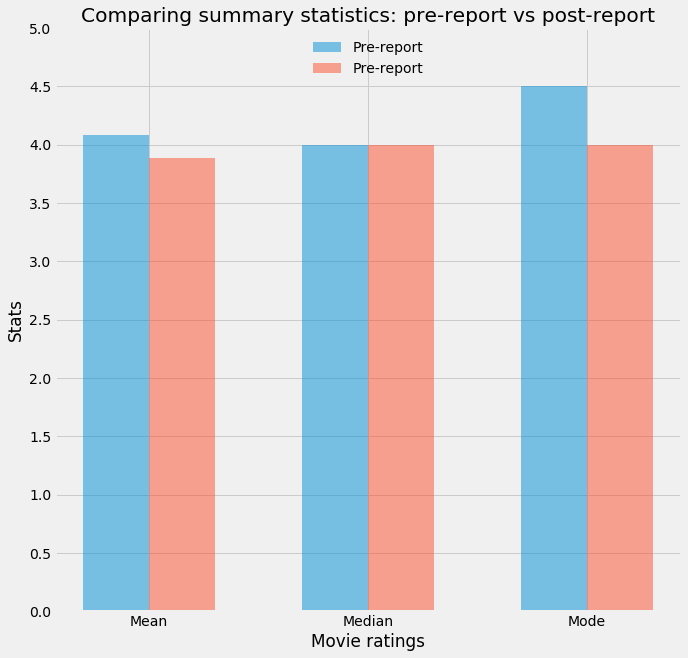

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Get summary statistics
pre_mean = pre_ratings_disp.mean()
pre_median = pre_ratings_disp.median()
pre_mode = pre_ratings_disp.mode()

post_mean = post_ratings_disp.mean()
post_median = post_ratings_disp.median()
post_mode = post_ratings_disp.mode()

# Plot the summary statistics
# Use FiveThirtyEight style
plt.style.use("fivethirtyeight")

# Plot histograms
figsize = (10, 10)
fig, ax = plt.subplots(figsize=figsize)

# Draw histograms
x = np.arange(3)
width = 0.3
alpha = 0.5
plt.bar(x=x, height=[pre_mean, pre_median, pre_mode], width=width, label="Pre-report", alpha=alpha)

plt.bar(x=x+width, height=[post_mean, post_median, post_mode], width=width, label="Pre-report", alpha=alpha)

# Tweak plot
plt.title("Comparing summary statistics: pre-report vs post-report")
plt.xlabel("Movie ratings")
plt.ylabel("Stats")
plt.xticks(x+(width/2), ["Mean", "Median", "Mode"])
plt.yticks(np.arange(0, 5.5, 0.5))
plt.legend(loc="upper center", framealpha = 0)


plt.show()

## 6.2. Kernel density estimation

Kernel density estimation yields probabilities of ratings. The plot not only confirms overall decrease in ratings following Hickey's report, but also reveals more detailed information. All findings will be discussed in `Section 7`.

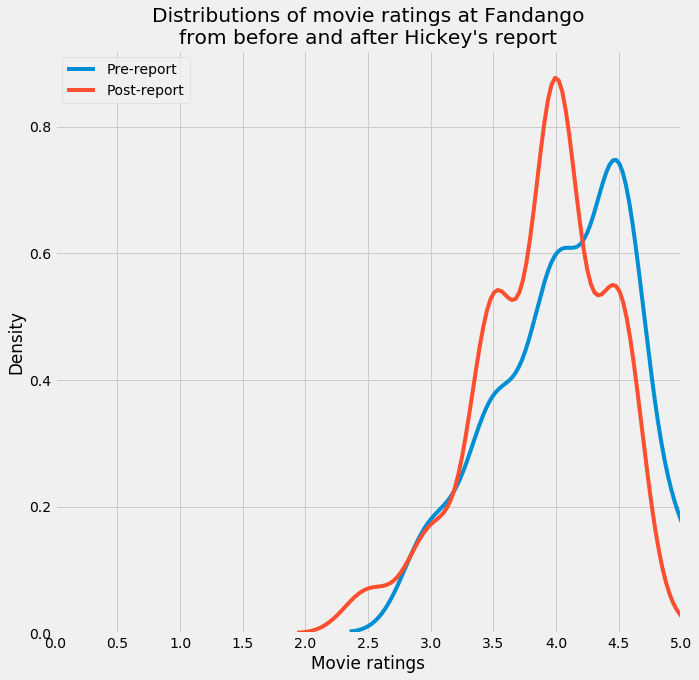

In [8]:
# Suppress FutureWarning (source https://stackoverflow.com/a/15778297)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



import seaborn as sns

# Use FiveThirtyEight style
plt.style.use("fivethirtyeight")

# Plot kernel density estimations
fig, ax = plt.subplots(figsize=figsize)
sns.kdeplot(pre_ratings_disp, label="Pre-report", ax=ax)
sns.kdeplot(post_ratings_disp, label="Post-report", ax=ax)

# Tweak plot
ax.set_title("Distributions of movie ratings at Fandango\nfrom before and after Hickey's report")
ax.set_xlim(0, 5)
ax.set_xlabel("Movie ratings")
ax.set_ylabel("Density")
ax.set_xticks(np.arange(0, 5.5, 0.5))

plt.show()

## 6.3. Relative frequencies

The same trend is observed here as that observed in the kernel density estimation.

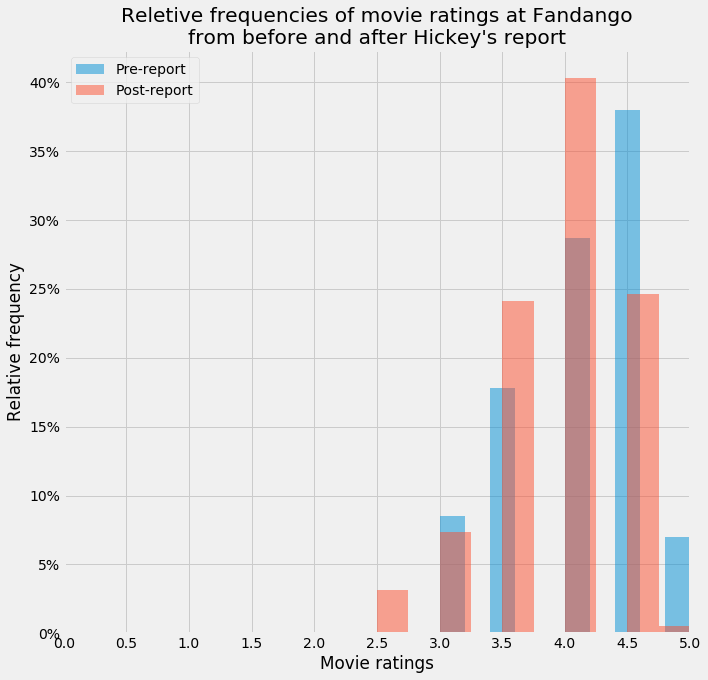

In [9]:
# Get relative frequencies (in percentage)
# of each rating (source https://stackoverflow.com/a/9768339)
pre_ratings_disp_perc = (np.zeros_like(pre_ratings_disp) + 1. / pre_ratings_disp.size)
post_ratings_disp_perc = (np.zeros_like(post_ratings_disp) + 1. / post_ratings_disp.size)

# Use FiveThirtyEight style
plt.style.use("fivethirtyeight")

# Plot histograms
fig, ax = plt.subplots(figsize=figsize)

# Draw histograms
pre_ratings_disp.plot.hist(label="Pre-report", legend=True, alpha=alpha, weights=pre_ratings_disp_perc, ax=ax)
post_ratings_disp.plot.hist(label="Post-report", legend=True, alpha=alpha, weights=post_ratings_disp_perc, ax=ax)


# Tweak plot
ax.set_title("Reletive frequencies of movie ratings at Fandango\nfrom before and after Hickey's report")
ax.set_xlim(0, 5)
ax.set_xlabel("Movie ratings")
ax.set_ylabel("Relative frequency")
ax.set_xticks(np.arange(0, 5.5, 0.5))

yticks = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in yticks])


plt.show()

# 7. Findings and conclusions

## 7.1. Fandango ratings for popular movies decreased following Hickey's report (when movies of only 2015 and 2016 are included).

The plots clearly shows decrease in movie ratings following Hickey's report.

Also notable is the difference in the peak heights and slope steepness in kernel density estimation and reletive frequency plots. Peaks show density or relative frequencies of mode (i.e. most prevelant ratings; about 4 and 4.5 in post- and pre-report ratings, respectively) while steepness indicates the relative proportions of other ratings. Compared to the pre-report ratings, the post-report ratings have a higher peak, with a steeper slope on the left side and a more gradual slope on the rigth side. The higher peak shows that the ratings vary less - pepole agree better on a particular rating. The change in steepness seems to show that, after Hickey's report, (1) the ratings which are lower than the mode became more scarce whereas (2) the ratings which are higher than the mode became more common.

In sum, following Hickey's report, the overall ratings have decreased (the whole distribution shifted to the left) even though the distribution of ratings became more generous (within the distribution, proportion of higher ratings have increased). Also, ratings converged better on the mode.

It is unclear what caused the changes in slopes. It could reflect the way that Fandango put together the ratings, but this possibility cannot be examined without access to the raw data. Another cause could be the sampling error.

## 7.2. Fan ratings may be generous

This may or may not be relevant with the changes in ratings.

Both distributions are left skewed. This may reflect that fan ratings (ploted here) tend to be generous when movies are at least OK. That is, fans might prefer to rate a movie high as long as they do not find it disasterous. This is probably in contrast to career critics who, I assume, reserve higher ratings (4 to 5) for from very-well made movies to exceptional ones.

# 8. Suggestions for future research

Following are suggestions for future research, excerpted from DataQuest. Due to time restraint, I will not attempt these for now.

___
*   Customize your graphs more by reproducing almost completely the FiveThirtyEight style. You can take a look [at this tutorial](https://www.dataquest.io/blog/making-538-plots/) if you want to do that.
*   Improve your project from a stylistical point of view by following the guidelines discussed [in this style guide](https://www.dataquest.io/blog/data-science-project-style-guide).
*   Use the two samples to compare ratings of different movie ratings aggregators and recommend what's the best website to check for a movie rating. There are many approaches you can take here — you can take some inspiration [from this article](https://medium.freecodecamp.org/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19).
*   Collect recent movie ratings data and formulate your own research questions. You can take a look [at this blog post](https://www.dataquest.io/blog/web-scraping-beautifulsoup/) to learn how to scrape movie ratings for IMDB and Metacritic.
___